# Wild Genome

2019.03.14

## Handling SNPs

(reproduced from R)



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

### Load files

**DO NOT RUN THIS AGAIN**
Check below, the loading of all_pass_snps.tsv

In [2]:
female = pd.read_csv('Female.snps.tsv',
                     sep = '\t'
                    )

male = pd.read_csv('Male.snps.tsv',
                   sep = '\t'
                  )

In [3]:
female_pass = female[female['FILTER'] == 'PASS']
male_pass = male[male['FILTER'] == 'PASS']

In [4]:
female_pass['sex'] = 'Female'
male_pass['sex'] = 'Male'

/home/mramos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mramos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
columns = ['CHROMOSOME', 'POSITION', 'DBSNP ID', 'REFERENCE BASE', 'OBSERVED BASE',
       'QUALITY SCORE', 'FILTER', 'QD', 'A,C,G,T', 'COVERAGE',
       'AMINO ACID CHANGE', 'CODON CHANGE', 'EFFECT', 'EXON ID',
       'FUNCTIONAL CLASS', 'GENE NAME', 'IMPACT', 'TRANSCRIPT ID',
       'GENOTYPE', 'GQ', 'ALLELE DEPTH',
       'ALLELE BALANCE', 'COVERAGE', 'SEX']

female_pass.columns = columns
male_pass.columns = columns

In [6]:
snps = pd.concat([female_pass, male_pass],
                 ignore_index = True
                )

snps.shape

(12772171, 24)

In [7]:
del female
del female_pass

del male
del male_pass

In [8]:
snps.to_csv('all_pass_snps.tsv',
            sep = '\t',
            index = False
           )

## Loading all_pass_snps.tsv

In [9]:
snps = pd.read_csv('all_pass_snps.tsv',
                   sep = '\t'
                  )

# snps.head()

### Number of SNPs

In [10]:
snps['SEX'].value_counts()

Male      6575026
Female    6197145
Name: SEX, dtype: int64

### Number of SNPs per Chromosome

In [11]:
snps_chromosome = pd.crosstab(snps['CHROMOSOME'], snps['SEX'])
# snps_chromosome.head()

In [12]:
chromosome_length = {'chr1': 23037639,
                     'chr2': 18779844,
                     'chr3': 19341862,
                     'chr4': 23867706,
                     'chr5': 25021643,
                     'chr6': 21508407,
                     'chr7': 21026613,
                     'chr8': 22385789,
                     'chr9': 23006712,
                     'chr10': 18140952,
                     'chr11': 19818926,
                     'chr12': 22702307,
                     'chr13': 24396255,
                     'chr14': 30274277,
                     'chr15': 20304914,
                     'chr16': 22053297,
                     'chr17': 17126926,
                     'chr18': 29360087,
                     'chr19': 24021853,
                     'chr1_random': 568933,
                     'chr3_random': 1220746,
                     'chr4_random': 76237,
                     'chr5_random': 421237,
                     'chr7_random': 1447032,
                     'chr9_random': 487831,
                     'chr10_random': 789605,
                     'chr11_random': 282498,
                     'chr12_random': 1566225,
                     'chr13_random': 3268264,
                     'chr16_random': 740079,
                     'chr17_random': 829735,
                     'chr18_random': 5170003,
                     'chrUn': 43220988
                    }

In [13]:
snps_chromosome['ChrLen'] = snps_chromosome.index.map(chromosome_length)
# snps_chromosome.head()

In [14]:
snps_chromosome['Female_Frequency'] = snps_chromosome['Female'] / snps_chromosome['ChrLen']
snps_chromosome['Male_Frequency'] = snps_chromosome['Male'] / snps_chromosome['ChrLen']
# snps_chromosome.head()

Text(0, 0.5, 'Ocurrences per Chr size')

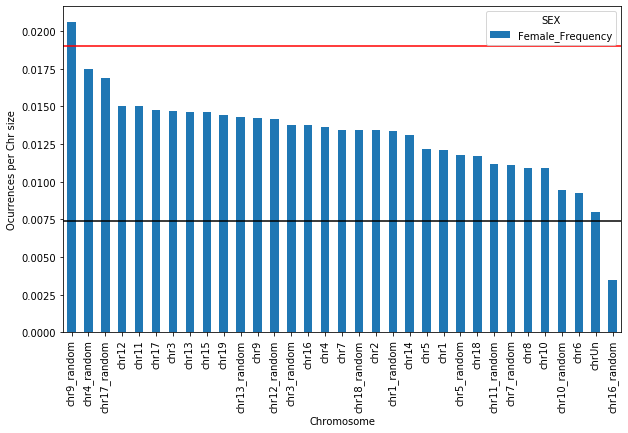

In [15]:
snps_female_freq = snps_chromosome.reset_index().sort_values(by = 'Female_Frequency', ascending = False)

q1, q3= np.percentile(snps_female_freq['Female_Frequency'], [25,75])

lower_bound = q1 - (1.5 * (q3 - q1)) 
upper_bound = q3 + (1.5 * (q3 - q1)) 

ax = snps_female_freq.plot(
    x = 'CHROMOSOME',
    y = ['Female_Frequency'],
    kind = 'bar',
    figsize = (10, 6)
)

ax.axhline(y = lower_bound, color = 'black')
ax.axhline(y = upper_bound, color = 'red')

ax.set_xlabel('Chromosome')
ax.set_ylabel('Ocurrences per Chr size')

In [16]:
snps_female_freq[(snps_female_freq['Female_Frequency'] > upper_bound)
                 | (snps_female_freq['Female_Frequency'] < lower_bound)
                ]

SEX,CHROMOSOME,Female,Male,ChrLen,Female_Frequency,Male_Frequency
31,chr9_random,10058,11870,487831,0.020618,0.024332
12,chr16_random,2565,1575,740079,0.003466,0.002128


Text(0, 0.5, 'Ocurrences per Chr size')

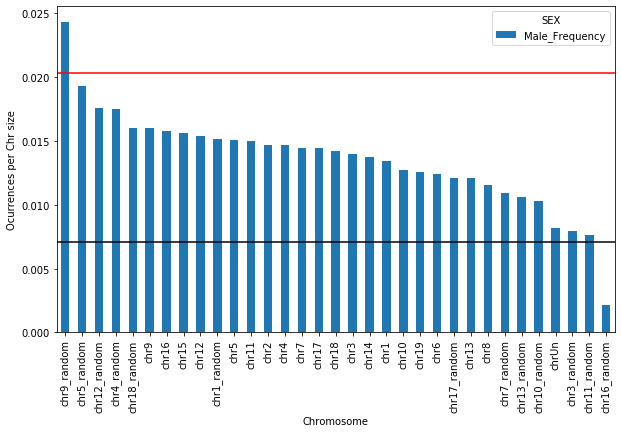

In [17]:
snps_male_freq = snps_chromosome.reset_index().sort_values(by = 'Male_Frequency', ascending = False)

q1, q3= np.percentile(snps_male_freq['Male_Frequency'], [25,75])

lower_bound = q1 - (1.5 * (q3 - q1)) 
upper_bound = q3 + (1.5 * (q3 - q1)) 

ax = snps_male_freq.plot(
    x = 'CHROMOSOME',
    y = ['Male_Frequency'],
    kind = 'bar',
    figsize = (10, 6)
)

ax.axhline(y = lower_bound, color = 'black')
ax.axhline(y = upper_bound, color = 'red')

ax.set_xlabel('Chromosome')
ax.set_ylabel('Ocurrences per Chr size')

In [18]:
snps_male_freq[(snps_male_freq['Male_Frequency'] > upper_bound)
               | (snps_male_freq['Male_Frequency'] < lower_bound)
              ]

SEX,CHROMOSOME,Female,Male,ChrLen,Female_Frequency,Male_Frequency
31,chr9_random,10058,11870,487831,0.020618,0.024332
12,chr16_random,2565,1575,740079,0.003466,0.002128


### Considering Fold Change (female/male)

In [19]:
snps_chromosome['fold_change'] = snps_chromosome['Female'] / snps_chromosome['Male']
snps_chromosome['fold_change_log2'] = np.log2(snps_chromosome['fold_change'])
# snps_chromosome.head()

Text(0, 0.5, 'Log2(Female / Male)')

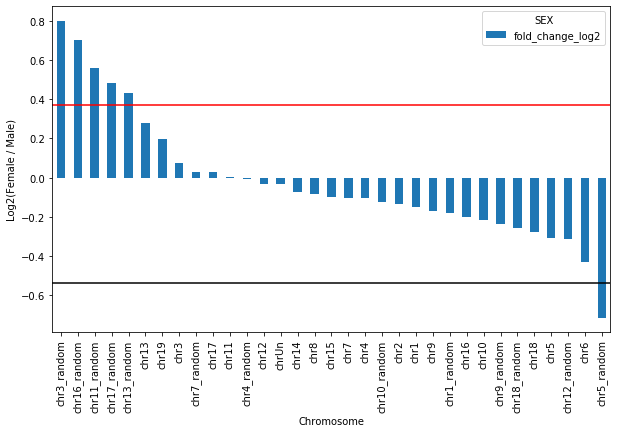

In [20]:
snps_fold_change = snps_chromosome.reset_index().sort_values(by = 'fold_change_log2', ascending = False)

q1, q3= np.percentile(snps_fold_change['fold_change_log2'], [25,75])

lower_bound = q1 - (1.5 * (q3 - q1)) 
upper_bound = q3 + (1.5 * (q3 - q1)) 

ax = snps_fold_change.plot(
    x = 'CHROMOSOME',
    y = ['fold_change_log2'],
    kind = 'bar',
    figsize = (10, 6)
)

ax.axhline(y = lower_bound, color = 'black')
ax.axhline(y = upper_bound, color = 'red')

ax.set_xlabel('Chromosome')
ax.set_ylabel('Log2(Female / Male)')

In [21]:
snps_fold_change[(snps_fold_change['fold_change_log2'] > upper_bound)
                 | (snps_fold_change['fold_change_log2'] < lower_bound)
                ]

SEX,CHROMOSOME,Female,Male,ChrLen,Female_Frequency,Male_Frequency,fold_change,fold_change_log2
21,chr3_random,16825,9680,1220746,0.013783,0.007930,1.738120,0.797528
12,chr16_random,2565,1575,740079,0.003466,0.002128,1.628571,0.703607
4,chr11_random,3162,2147,282498,0.011193,0.007600,1.472753,0.558515
14,chr17_random,14029,10043,829735,0.016908,0.012104,1.396893,0.482222
8,chr13_random,46630,34602,3268264,0.014268,0.010587,1.347610,0.430403
25,chr5_random,4965,8141,421237,0.011787,0.019326,0.609876,-0.713412


In [22]:
len(snps[(snps['SEX'] == 'Female')
         & (snps['CHROMOSOME'] == 'chr1')
         & (snps['POSITION'] >= 1)
         & (snps['POSITION'] < 1000)
        ].index)

18